### Import Dependencies

In [1]:
from PIL import Image
from tabulate import tabulate

from rmac import SearchEngine
from utils import show_query_img, show_top_matches
from evaluation import compute_mAP

### Open Query Image

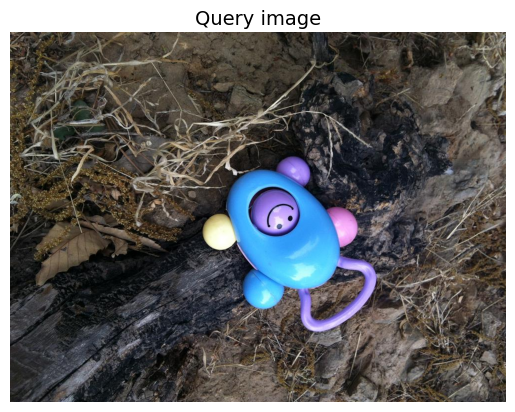

In [2]:
# Open image 
query_path = "db/data/img_80.jpg"

# Show query image
show_query_img(img_path=query_path)

---

### Instantiate Search Engine Object with VGG16 Backbone

In [3]:
img_ret = SearchEngine(db_path='db/data', backbone='vgg16', max_scale_level=6)

2023-10-01 17:19:19 - INFO: Database path is: db
2023-10-01 17:19:19 - INFO: Number of images in the database: 100
2023-10-01 17:19:19 - INFO: Using device: cpu
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /homes/obaldoni/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 65.6MB/s] 
2023-10-01 17:19:34 - INFO: Backbone model is: vgg16
2023-10-01 17:19:34 - INFO: Min scale level is: 1
2023-10-01 17:19:34 - INFO: Max scale level is: 6
2023-10-01 17:19:34 - INFO: Loading database feature matrix...


### Retrieve Similar Images

In [4]:
# Compute top matches
img = Image.open(query_path).convert('RGB')
img = img_ret.transform(img).to(img_ret.device)
results = img_ret.compute_top_matches(img, top_k=10)

table = [(path, score) for path, score in results]

print(f"Top matches for query {query_path}:")
print(tabulate(table, headers=['Path', 'Score'], tablefmt="rounded_grid"))

2023-10-01 17:19:39 - INFO: Computing top-k matches...


Top matches for query db/data/img_80.jpg:
Path                   Score
------------------  --------
db/data/img_80.jpg  1
db/data/img_79.jpg  0.938267
db/data/img_78.jpg  0.922706
db/data/img_71.jpg  0.911773
db/data/img_77.jpg  0.911151
db/data/img_60.jpg  0.908811
db/data/img_34.jpg  0.907435
db/data/img_98.jpg  0.902855
db/data/img_74.jpg  0.893633
db/data/img_58.jpg  0.889524


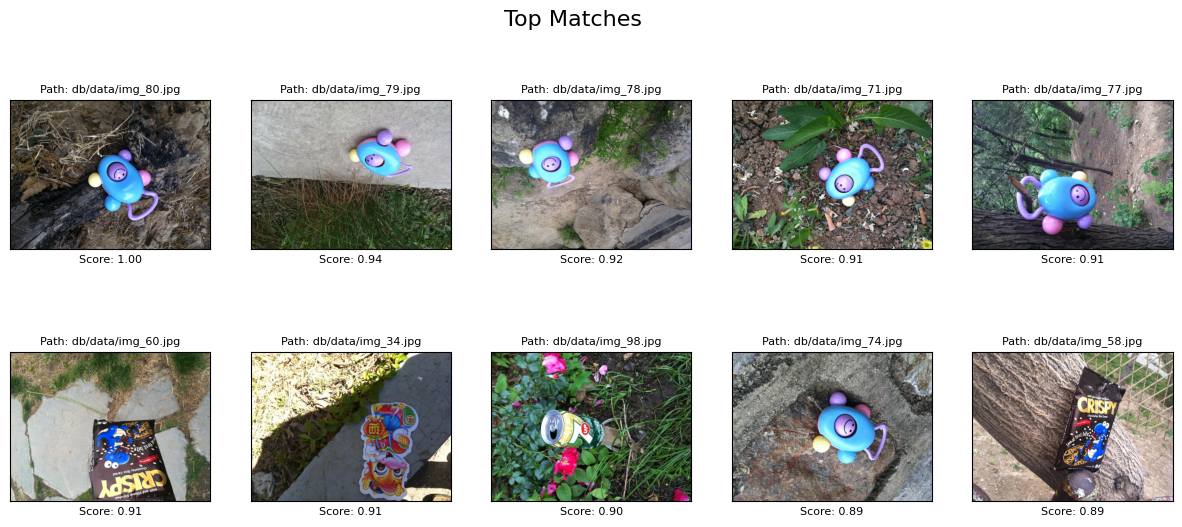

In [5]:
show_top_matches(results)

### Evaluate mAP

In [6]:
k_thresholds = [3, 5, 10, 20]
table_data = []

for k in k_thresholds:
    mAP = compute_mAP(img_ret, top_k_threshold=k)  
    table_data.append([k, mAP])

table_headers = ["k_threshold", "mAP"]

table = tabulate(table_data, headers=table_headers, tablefmt="rounded_grid")

print(table)

 45%|████▌     | 45/100 [01:36<02:31,  2.76s/it]2023-10-01 17:21:57 - INFO: Computing top-k matches...


: 

---

### Instantiate Search Engine Object with VGG19 Backbone

In [ ]:
img_ret = SearchEngine(db_path='db/data', backbone='vgg19', max_scale_level=6)

### Retrieve Similar Images

In [ ]:
# Compute top matches
img = Image.open(query_path).convert('RGB')
img = img_ret.transform(img).to(img_ret.device)
results = img_ret.compute_top_matches(img, top_k=10)

table = [(path, score) for path, score in results]

print(f"Top matches for query {query_path}:")
print(tabulate(table, headers=['Path', 'Score'], tablefmt="rounded_grid"))

In [ ]:
show_top_matches(results)

### Evaluate mAP

In [ ]:
k_thresholds = [3, 5, 10, 20]
table_data = []

for k in k_thresholds:
    mAP = compute_mAP(img_ret, top_k_threshold=k)  
    table_data.append([k, mAP])

table_headers = ["k_threshold", "mAP"]

table = tabulate(table_data, headers=table_headers, tablefmt="rounded_grid")

print(table)

---

### Instantiate Search Engine Object with DenseNet Backbone

In [ ]:
img_ret = SearchEngine(db_path='db/data', backbone='densenet', max_scale_level=6)

### Retrieve Similar Images

In [ ]:
# Compute top matches
img = Image.open(query_path).convert('RGB')
img = img_ret.transform(img).to(img_ret.device)
results = img_ret.compute_top_matches(img, top_k=10)

table = [(path, score) for path, score in results]

print(f"Top matches for query {query_path}:")
print(tabulate(table, headers=['Path', 'Score'], tablefmt="rounded_grid"))

In [ ]:
show_top_matches(results)

### Evaluate mAP

In [ ]:
k_thresholds = [3, 5, 10, 20]
table_data = []

for k in k_thresholds:
    mAP = compute_mAP(img_ret, top_k_threshold=k)  
    table_data.append([k, mAP])

table_headers = ["k_threshold", "mAP"]

table = tabulate(table_data, headers=table_headers, tablefmt="rounded_grid")

print(table)